In [58]:
import io
import torch
from PIL import Image
from torchvision.transforms import ToTensor
from emonet.emonet.models.emonet import EmoNet

In [59]:
torch.__version__

'1.10.2'

In [60]:
model = EmoNet()
model.load_state_dict(torch.load("D:/Material/Semester 8/DA526/Project/codes/va_value/emonet/pretrained/emonet_8.pth"))

<All keys matched successfully>

In [61]:
model.eval()

(2000, 1333)


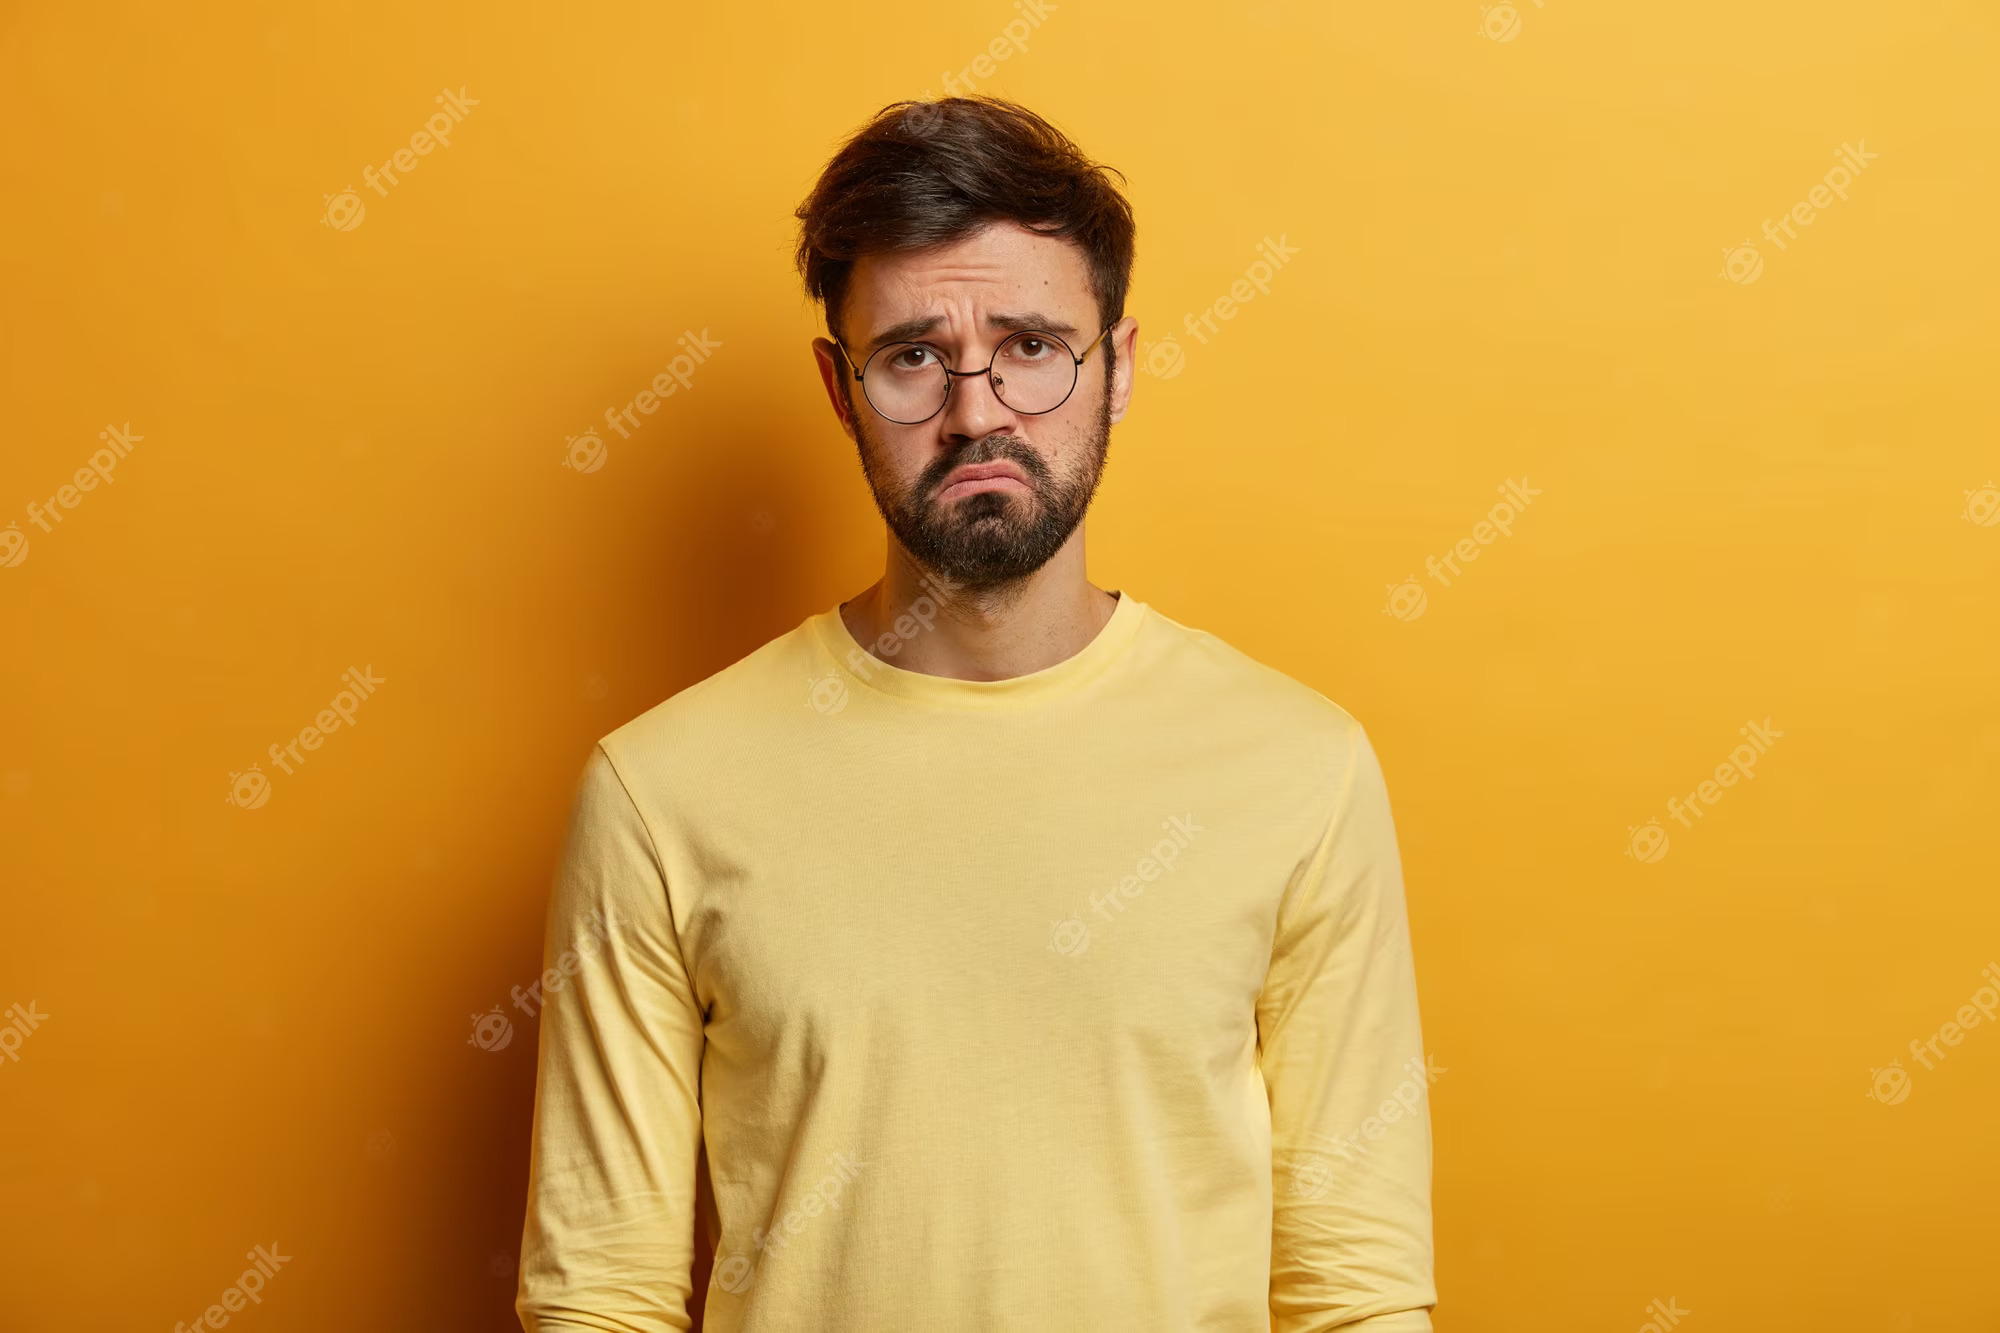

In [62]:
# Preprocess the image
image = Image.open("sad.jpg").convert('RGB')
print(image.size)
image

(256, 256)


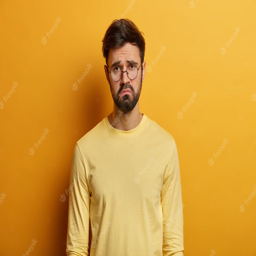

In [63]:
# input_width = (image.size[0]//64)*64
# input_height = (image.size[1]//64)*64
image = image.resize((256, 256))  # Resize the image
print(image.size)
image

In [64]:
image_tensor = ToTensor()(image)  # Convert the image to a PyTorch tensor
print(image_tensor.size)
# image_tensor = transform_image(image)  # Convert the image to a PyTorch tensor
image_tensor = image_tensor.reshape(1,3,256,256)
# image_tensor = image_tensor.unsqueeze(0)  # Add a batch dimension
image_tensor.shape
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# image_tensor = image_tensor.to(device)

<built-in method size of Tensor object at 0x0000028A998ECBD8>


torch.Size([1, 3, 256, 256])

In [65]:
image_tensor.size()

torch.Size([1, 3, 256, 256])

In [66]:
# Perform inference
with torch.no_grad():
    output = model(image_tensor)

In [67]:
output.keys()

dict_keys(['heatmap', 'expression', 'valence', 'arousal'])

In [68]:
output['valence']

tensor([-0.0861])

In [69]:
output['arousal']

tensor([0.3384])

In [70]:
output['expression']

tensor([[-13.3785, -19.2200, -16.5307, -15.3337, -14.3269, -15.0325, -15.1261,
         -24.6668]])

In [71]:
output['heatmap'].shape

torch.Size([1, 68, 64, 64])